In [1]:
import turicreate as tc

In [4]:
image_train= tc.SFrame('datasets/image_train_data/image_train')
image_test= tc.SFrame('datasets/image_test_data/image_test')

In [5]:
image_train.head()

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


In [6]:
# Train a nearest neighbors model for image retrieval
knn_model= tc.nearest_neighbors.create(image_train,features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

,SArray
0,

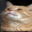

In [7]:
# Use image retrieval model with deep features to find similar images
cat= image_train[18:19]
cat['image'].explore()

In [8]:
knn_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 20.975ms     |

| Done         |         | 100         | 234.821ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,384,0.0,1
0,6910,36.94031379506751,2
0,39777,38.46348889747021,3
0,36870,39.75596231189652,4
0,41734,39.786601414815024,5


In [10]:
def get_images_from_ids(querry_result):
    return image_train.filter_by(querry_result['reference_label'],'id')

In [11]:
cat_neighbors= get_images_from_ids(knn_model.query(cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 16.909ms     |

| Done         |         | 100         | 241.902ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

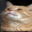
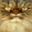
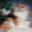
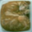
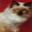

In [12]:
cat_neighbors['image'].explore()

,SArray
0,

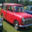

In [14]:
car= image_train[8:9]
car['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 13.738ms     |

| Done         |         | 100         | 210.105ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

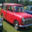
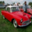
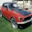
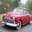
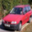

In [16]:
get_images_from_ids(knn_model.query(car))['image'].explore()

In [17]:
show_neighbors= lambda i:get_images_from_ids(knn_model.query(image_train[i:i+1]))['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 29.676ms     |

| Done         |         | 100         | 347.311ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

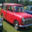
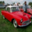
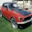
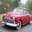
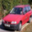

In [18]:
show_neighbors(8)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 18.24ms      |

| Done         |         | 100         | 409.187ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

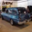
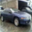
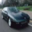
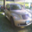
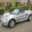

In [19]:
show_neighbors(26)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 20.094ms     |

| Done         |         | 100         | 308.319ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

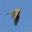
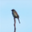
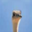
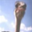
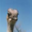

In [20]:
show_neighbors(1222)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 19.481ms     |

| Done         |         | 100         | 260.337ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

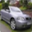
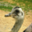
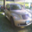
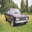
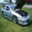

In [21]:
show_neighbors(2000)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 20.422ms     |

| Done         |         | 100         | 254.886ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

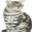
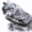
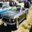
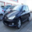
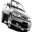

In [22]:
show_neighbors(1784)

# Programming Assignment:

In [24]:
image_train['label'].summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [25]:
automobile = image_train.filter_by(['automobile'],'label')
cat = image_train.filter_by(['cat'],'label')
dog = image_train.filter_by(['dog'],'label')
bird = image_train.filter_by(['bird'],'label')

In [27]:
automobile_model  = tc.nearest_neighbors.create(automobile, features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [28]:
cat_model  = tc.nearest_neighbors.create(cat, features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [29]:
dog_model  = tc.nearest_neighbors.create(dog, features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [30]:
bird_model  = tc.nearest_neighbors.create(bird, features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [31]:
image_test[0:1]

id,image,label,deep_features,image_array
0,Height: 32 Width: 32,cat,"[1.1346900463104248, 0.0,0.0, 0.0, ...","[158.0, 112.0, 49.0,159.0, 111.0, 47.0, ..."


,SArray
0,

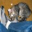

In [33]:
image_test[0:1]['image'].explore()

In [34]:
cat_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 32.536ms     |

query_label,reference_label,distance,rank
0,16289,34.62371920804245,1
0,45646,36.00687992842462,2
0,32139,36.52008134363789,3
0,25713,36.754850252057054,4
0,331,36.87312281675268,5


| Done         |         | 100         | 113.694ms    |

+--------------+---------+-------------+--------------+

In [35]:
def get_images_from_ids(query_result):
    return image_train.filter_by(query_result['reference_label'],'id')

,SArray
0,

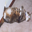

In [37]:
cat_image = image_train[image_train['id']==16289]
cat_image['image'].explore()

In [38]:
dog_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 11.938ms     |

| Done         |         | 100         | 88.185ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16976,37.464262878423774,1
0,13387,37.56668321685285,2
0,35867,37.60472670789396,3
0,44603,37.70655851529755,4
0,6094,38.511325490739715,5


,SArray
0,

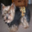

In [39]:
dog_image = image_train[image_train['id']==16976]
dog_image['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 21.086ms     |

| Done         |         | 100         | 88.7ms       |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

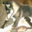
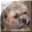
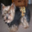
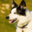
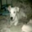

In [41]:
get_images_from_ids(dog_model.query(image_test[0:1]))['image'].explore()

In [42]:
cat_model.query(image_test[0:1])['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 13.246ms     |

| Done         |         | 100         | 121.02ms     |

+--------------+---------+-------------+--------------+

36.15573070978294

In [43]:
dog_model.query(image_test[0:1])['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 19.524ms     |

| Done         |         | 100         | 92.459ms     |

37.77071136184156

+--------------+---------+-------------+--------------+

In [44]:
image_test_automobile = image_test.filter_by(['automobile'],'label')
image_test_cat = image_test.filter_by(['cat'],'label')
image_test_dog = image_test.filter_by(['dog'],'label')
image_test_bird = image_test.filter_by(['bird'],'label')

In [45]:
dog_cat_neighbors = cat_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 127000  | 24.9509     | 444.609ms    |

| Done         | 509000  | 100         | 644.724ms    |

+--------------+---------+-------------+--------------+

In [46]:
dog_dog_neighbors = dog_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 127000  | 24.9509     | 479.023ms    |

| Done         | 509000  | 100         | 568.871ms    |

+--------------+---------+-------------+--------------+

In [47]:
dog_automobile_neighbors = automobile_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 127000  | 24.9509     | 526.513ms    |

| Done         | 509000  | 100         | 537.778ms    |

+--------------+---------+-------------+--------------+

In [48]:
dog_bird_neighbors = bird_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 119000  | 24.8954     | 449.535ms    |

| Done         | 478000  | 100         | 522.919ms    |

+--------------+---------+-------------+--------------+

In [50]:
dog_distances = tc.SFrame({'dog_automobile': dog_automobile_neighbors['distance'],
                              'dog_bird': dog_bird_neighbors['distance'],
                              'dog_cat': dog_cat_neighbors['distance'],
                              'dog_dog': dog_dog_neighbors['distance']
                             })

In [51]:
dog_distances.head()

dog_automobile,dog_bird,dog_cat,dog_dog
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726335
46.00213318067788,41.3382958924861,38.83532688735542,32.84584956840554
42.946229069238804,38.615759085289056,36.97634108541546,35.03970731890584
41.68660600484793,37.08922699538214,34.575007291446106,33.90103276968193
39.22696649347584,38.27228869398105,34.77882479101661,37.484925090925636
40.58451176980721,39.146208923590486,35.11715782924591,34.94516534398124
45.10673529610854,40.523040105962316,40.60958309132649,39.095727834463545
41.32211409739762,38.19479183926956,39.90368673062214,37.76961310322034
41.82446549950164,40.156713166131446,38.067470016821176,35.10891446032838
45.497692940110376,45.55979626027668,42.72587329506032,43.242283258453455


In [52]:
def is_dog_correct(row):  
    if row['dog_dog'] <= min(row.values()):     
        return 1    
    else:        
        return 0

In [53]:
dog_distances.apply(is_dog_correct)

dtype: int
Rows: 1000
[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, ... ]

In [54]:
dog_distances.apply(is_dog_correct).sum()

678

In [55]:
cat_distances = tc.SFrame({'cat_automobile': automobile_model.query(image_test_cat, k=1)['distance'],
                                 'cat_bird': bird_model.query(image_test_cat, k=1)['distance'],
                                 'cat_cat': cat_model.query(image_test_cat, k=1)['distance'],
                                 'cat_dog': dog_model.query(image_test_cat, k=1)['distance'],
                                })

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 127000  | 24.9509     | 504.122ms    |

| Done         | 509000  | 100         | 584.303ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 120000  | 25.1046     | 600.391ms    |

| Done         | 478000  | 100         | 735.411ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 127000  | 24.9509     | 541.084ms    |

| Done         | 509000  | 100         | 620.75ms     |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 128000  | 25.1473     | 673.243ms    |

| Done         | 509000  | 100         | 717.356ms    |

+--------------+---------+-------------+--------------+

In [56]:
cat_distances.head()

cat_automobile,cat_bird,cat_cat,cat_dog
39.67105827921273,38.07426586900459,34.62371920804243,37.464262878423845
43.00890566881215,36.36740241377261,33.868057930239424,29.347231958505894
38.60100066036172,35.303939494706285,32.46151689024062,32.259964047497306
39.35663070911102,38.89440296011285,35.77082102542339,35.385208518819475
38.3572372618227,34.28204098747585,31.157768641742653,30.04429850876174
42.09047931808273,44.53521701779428,41.398603584704766,35.4741000423819
39.05202512531326,34.0290595084087,30.989459495892984,32.58452752259978
39.30586450690295,39.02369249827745,37.08146073866276,37.650285261439834
43.02481297990393,40.83340542972473,39.988386368829005,36.98013535120841
45.67491764256238,40.12588356010239,39.70766330973091,41.12594107067673


In [57]:
def is_cat_correct(row):  
    if row['cat_cat'] <= min(row.values()):     
        return 1    
    else:        
        return 0

In [58]:
cat_distances.apply(is_cat_correct).sum()

548

In [59]:
dog_distances.apply(is_dog_correct).sum()/float(len(dog_distances))

0.678